In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

df = pd.read_csv("data/Mall_Customers.csv")

In [2]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
df.isnull().sum() # 결측치 확인. 결측치 없으므로 그대로 진행

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
# 클러스터링에 사용할 Feature 선택
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [7]:
# 표준화: 데이터의 평균을 0, 표준편차를 1로 조정
## 정규화에 비해 이상치의 영향을 비교적 적게 받음
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 1. K-means

d:\ProgramFiles\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\ProgramFiles\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\ProgramFiles\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\ProgramFiles\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

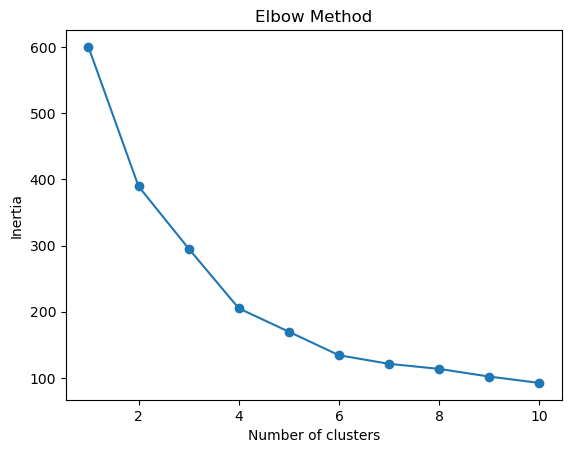

In [8]:
# 최적의 클러스터 수 결정(1): Elbow Method
## inertia(클러스터 내 제곱합의 합) 값 사용
inertia = [] # inertia: 클러스터 내 제곱합의 합
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

d:\ProgramFiles\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\ProgramFiles\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\ProgramFiles\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\ProgramFiles\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

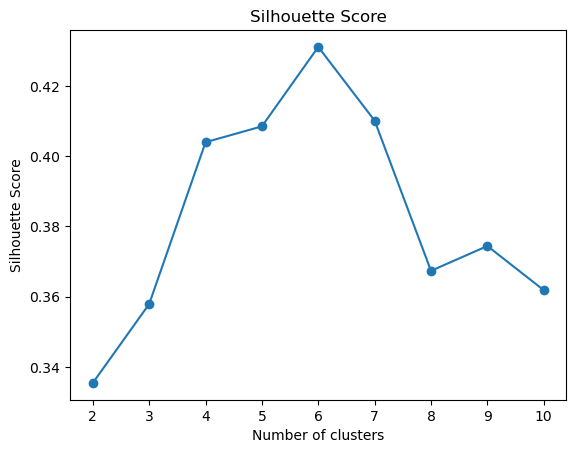

In [9]:
# 최적의 클러스터 수 결정(2): Silhouette Score
## 각 데이터 포인트의 클러스터 내 거리와 가장 가까운 다른 클러스터까지의 거리를 비교하여 클러스터링의 품질 측정
silhouette_scores = []
for k in range(2, 11): # 클러스터 수는 2개 이상이어야 함
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.show()

d:\ProgramFiles\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


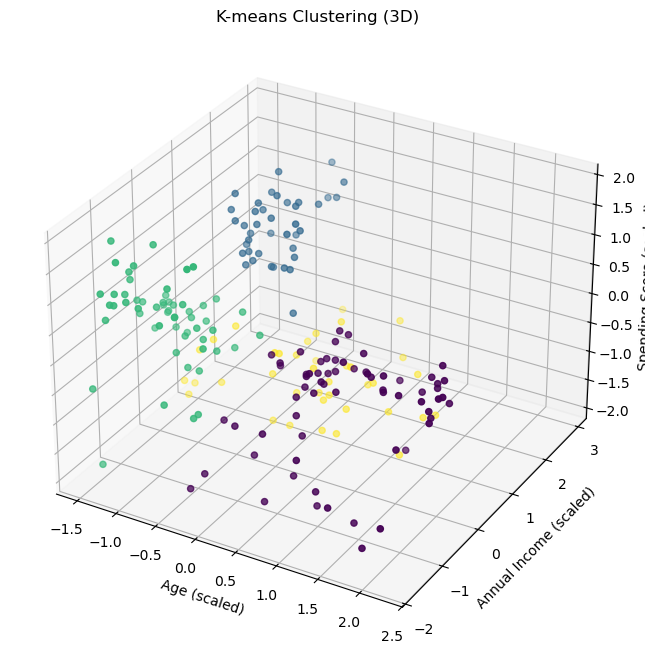

In [10]:
# Elbow Method 결과 기반
kmeans = KMeans(n_clusters=4, random_state=42) # 클러스터 수 4로 설정
kmeans.fit(X_scaled)
labels_kmeans = kmeans.labels_

# 3D 시각화
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=labels_kmeans, cmap='viridis')
ax.set_xlabel('Age (scaled)')
ax.set_ylabel('Annual Income (scaled)')
ax.set_zlabel('Spending Score (scaled)')
plt.title('K-means Clustering (3D)')
plt.show()

d:\ProgramFiles\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


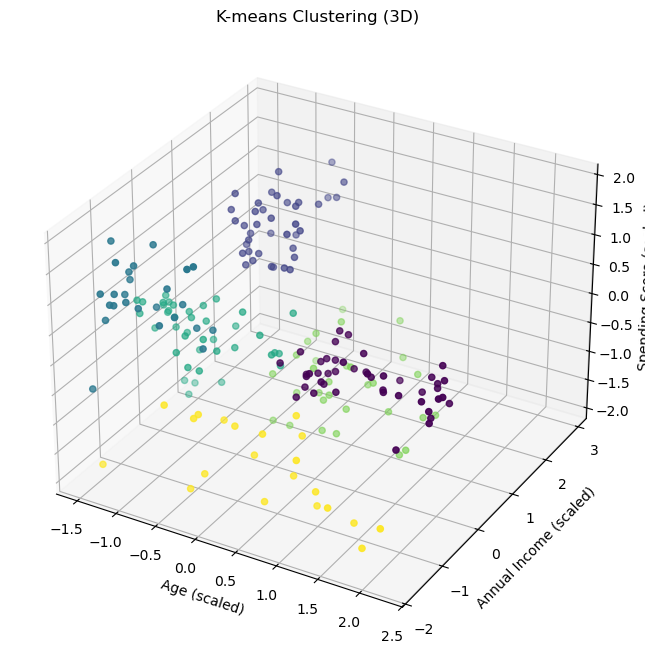

In [11]:
# Silhouette Score 결과 기반
kmeans = KMeans(n_clusters=6, random_state=42) # 클러스터 수 6으로 설정
kmeans.fit(X_scaled)
labels_kmeans = kmeans.labels_

# 3D 시각화
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=labels_kmeans, cmap='viridis')
ax.set_xlabel('Age (scaled)')
ax.set_ylabel('Annual Income (scaled)')
ax.set_zlabel('Spending Score (scaled)')
plt.title('K-means Clustering (3D)')
plt.show()

# 2. DBSCAN (미흡)

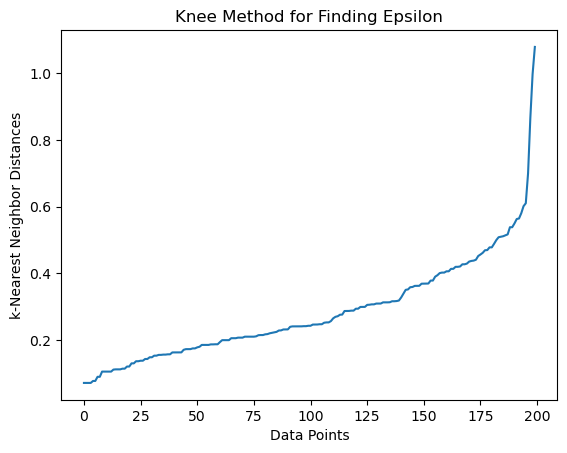

In [12]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# ... (데이터 로드 및 표준화 코드)

# k-최근접 이웃 거리 계산
neighbors = NearestNeighbors(n_neighbors=5) # min_samples 값과 동일하게 설정
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

# 거리 정렬
distances = np.sort(distances, axis=0)
distances = distances[:,1] # 자기 자신과의 거리는 제외

# 거리-k 그래프 그리기
plt.plot(distances)
plt.xlabel('Data Points')
plt.ylabel('k-Nearest Neighbor Distances')
plt.title('Knee Method for Finding Epsilon')
plt.show()

# +a. K-means, DBSCAN, GMM의 Silhouette Score 비교

d:\ProgramFiles\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


K-means Silhouette Score: 0.43106526216603014
DBSCAN Silhouette Score: 0.18451372756506046
GMM Silhouette Score: 0.3999977925024676


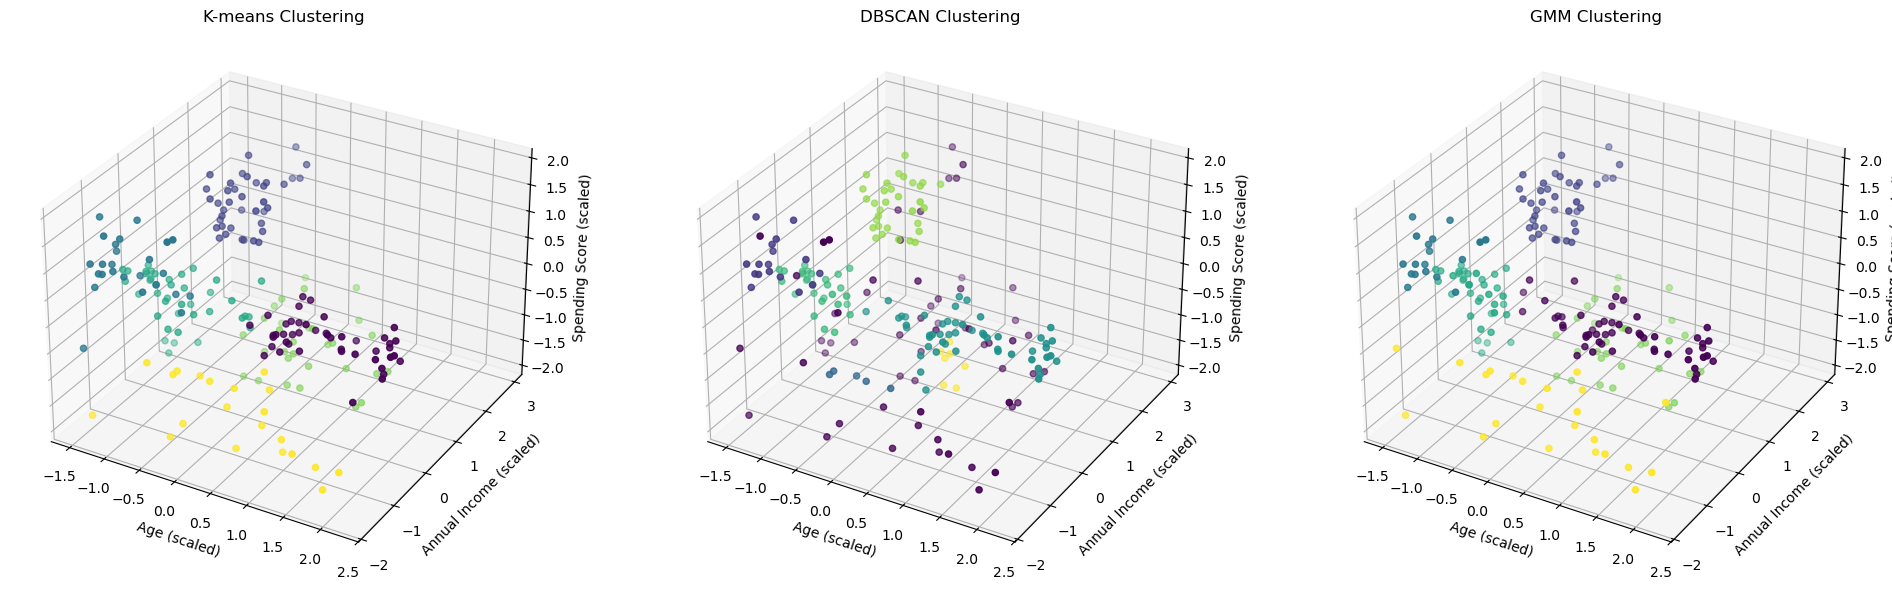

In [17]:
from sklearn.mixture import GaussianMixture

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5) # eps와 min_samples는 적절히 조정해야 함
# Knee Method를 사용해보았으나 적절한 지점을 찾기 어려웠다. 
labels_dbscan = dbscan.fit_predict(X_scaled)

# GMM
gmm = GaussianMixture(n_components=6, random_state=42) # 클러스터 수 6으로 설정
labels_gmm = gmm.fit_predict(X_scaled)

# Silhouette Score 비교
print("K-means Silhouette Score:", silhouette_score(X_scaled, labels_kmeans)) # 클러스터 수: 6(앞선 코드셀에서 지정)
print("DBSCAN Silhouette Score:", silhouette_score(X_scaled, labels_dbscan)) # DBSCAN은 노이즈 데이터(-1)가 있을 수 있으므로 주의
print("GMM Silhouette Score:", silhouette_score(X_scaled, labels_gmm))

# 시각화 (KMeans, DBSCAN, GMM 비교)
fig, axes = plt.subplots(1, 3, figsize=(24, 8), subplot_kw={'projection': '3d'})

axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=labels_kmeans, cmap='viridis')
axes[0].set_xlabel('Age (scaled)')
axes[0].set_ylabel('Annual Income (scaled)')
axes[0].set_zlabel('Spending Score (scaled)')
axes[0].set_title('K-means Clustering')

axes[1].scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=labels_dbscan, cmap='viridis')
axes[1].set_xlabel('Age (scaled)')
axes[1].set_ylabel('Annual Income (scaled)')
axes[1].set_zlabel('Spending Score (scaled)')
axes[1].set_title('DBSCAN Clustering')

axes[2].scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=labels_gmm, cmap='viridis')
axes[2].set_xlabel('Age (scaled)')
axes[2].set_ylabel('Annual Income (scaled)')
axes[2].set_zlabel('Spending Score (scaled)')
axes[2].set_title('GMM Clustering')

plt.show()

K-means와 GMM을 동일한 클러스터 수(6)로 분류한 결과, 대체로 유사하게 분류된 것을 확인할 수 있었다. Silhouette Score을 비교하였을 때는 K-means가 약 0.43의 값으로, 약 0.40의 점수를 낸 GMM보다 높게 나타났다.